In [19]:
import pandas as pd
import numpy as np
import sqlite3 as sq3
from pylab import mpl, plt

In [9]:
SMA = 25
threshold = 3.5

In [1]:
# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
file_path = '/Users/benny/Downloads/USD_JPY Historical Data.csv'

# Use pandas to read the Excel file
df = pd.read_csv(file_path)

# Print the dataframe to verify it was read correctly
print(df)

NameError: name 'pd' is not defined

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.sort_index(ascending=True,inplace=True)
df.drop(['Open','High','Low','Vol.','Change %'], axis=1, inplace=True)
print(df)

             Price    Open    High     Low  Vol. Change %
Date                                                     
2010-01-01   93.04   93.04   93.04   93.04   NaN    0.01%
2010-01-04   92.47   92.75   93.21   92.19   NaN   -0.60%
2010-01-05   91.58   92.47   92.51   91.25   NaN   -0.97%
2010-01-06   92.38   91.56   92.74   91.53   NaN    0.87%
2010-01-07   93.45   92.36   93.77   92.11   NaN    1.16%
...            ...     ...     ...     ...   ...      ...
2024-05-13  156.20  155.74  156.30  155.55   NaN    0.31%
2024-05-14  156.52  156.24  156.76  156.22   NaN    0.21%
2024-05-15  154.30  156.52  156.56  154.15   NaN   -1.42%
2024-05-16  155.41  154.30  155.54  153.60   NaN    0.72%
2024-05-17  155.65  155.40  155.99  155.25   NaN    0.16%

[3751 rows x 6 columns]


In [4]:
df['returns'] = np.log(df['Price'] / df['Price'].shift(1))
print(df)

             Price    Open    High     Low  Vol. Change %   returns
Date                                                               
2010-01-01   93.04   93.04   93.04   93.04   NaN    0.01%       NaN
2010-01-04   92.47   92.75   93.21   92.19   NaN   -0.60% -0.006145
2010-01-05   91.58   92.47   92.51   91.25   NaN   -0.97% -0.009671
2010-01-06   92.38   91.56   92.74   91.53   NaN    0.87%  0.008698
2010-01-07   93.45   92.36   93.77   92.11   NaN    1.16%  0.011516
...            ...     ...     ...     ...   ...      ...       ...
2024-05-13  156.20  155.74  156.30  155.55   NaN    0.31%  0.003078
2024-05-14  156.52  156.24  156.76  156.22   NaN    0.21%  0.002047
2024-05-15  154.30  156.52  156.56  154.15   NaN   -1.42% -0.014285
2024-05-16  155.41  154.30  155.54  153.60   NaN    0.72%  0.007168
2024-05-17  155.65  155.40  155.99  155.25   NaN    0.16%  0.001543

[3751 rows x 7 columns]


In [8]:
df['SMA'] = df['Price'].rolling(SMA).mean()

In [12]:
df['distance'] = df['Price'] - df['SMA']

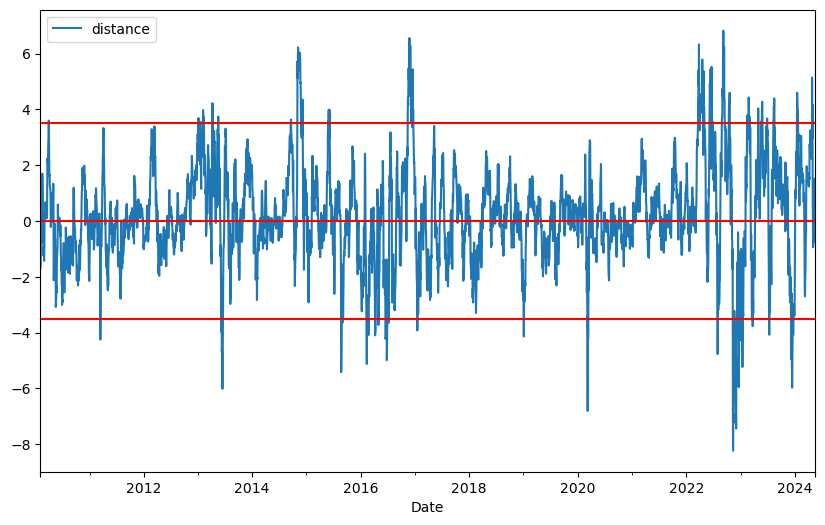

In [20]:
df['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');

In [23]:
df['position'] = np.where(df['distance'] > threshold,-1, np.nan)
df['position'] = np.where(df['distance'] < -threshold,1, df['position'])
df['position'] = np.where(df['distance'] *df['distance'].shift(1) < 0, 0, df['position'])
df['position'] = df['position'].ffill().fillna(0)

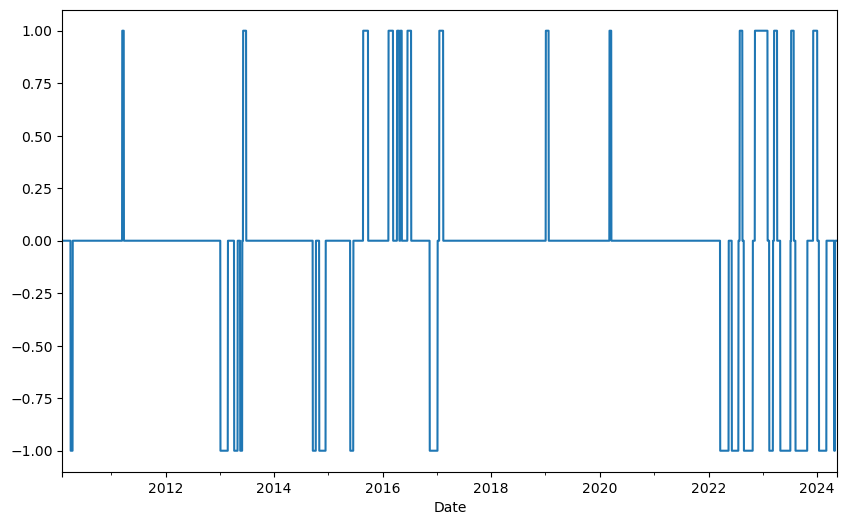

In [24]:
df['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],figsize=(10, 6));


In [25]:
df['strategy'] = df['position'].shift(1) * df['returns']

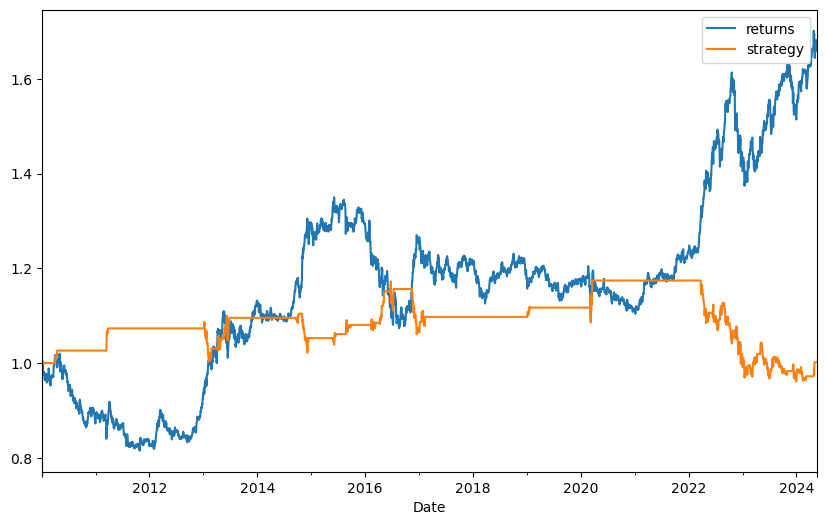

In [26]:
df[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));